In [1]:
# MOhammad Javad Rajabi - 9831025
# Neural Network Projects 
# fully connected networks for classification

In this project, we are going to categorize 10-CIFAR database images. For this purpose, we implemented a neural network that includes the input layer with 32 * 32 = 1024 neurons, two middle or hidden layers, each of which has 16 neurons, and the output layer, which contains 4 neurons for classification.

**Step # 1**- Get dataset, data visualization, and preprocessing



First we add the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import random

then, we download the CIFAR10 database

In [3]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
!tar xzf CIFAR10.tar.gz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:00<00:00, 248MB/s]


displaying 10 images from different dataset classes along with lables

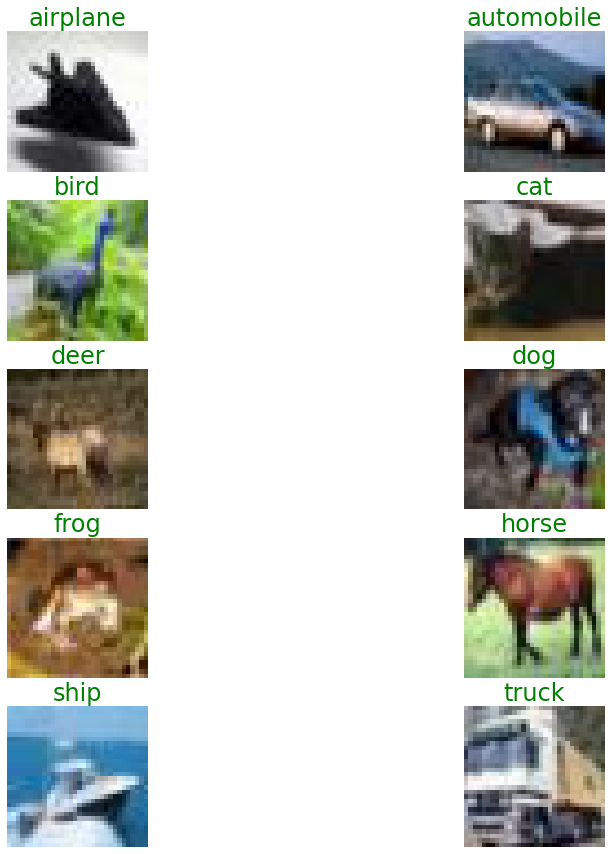

In [4]:
fig = plt.figure(figsize=(15,15))

classes = ["airplane" ,"automobile" ,"bird" ,"cat" ,"deer" ,"dog" ,"frog" ,"horse" ,"ship" ,"truck"]

for i in range(len(classes)):

    fig.add_subplot(5, 2, i+1)
    Image1 = img.imread('/content/CIFAR10/train/{}/0000.jpg'.format(classes[i]))
    plt.imshow(Image1)
    plt.axis('off')
    plt.title("{}".format(classes[i]) , color="green" , fontsize=24)




Extraction of training and test data in the first 4 categories of data

In [5]:

classes = ["airplane" ,"automobile" ,"bird" ,"cat"]

train_data = []
test_data = []

test_lable = np.zeros((4000,4), dtype=int)
train_lable = np.zeros((20000,4), dtype=int)

for i in range(len(classes)):
    for j in range(5000):
        myimg = img.imread('/content/CIFAR10/train/{}/{}.jpg'.format(classes[i] , str(j).zfill(4)))
        train_data.append(myimg)
        train_lable[j+(i*5000)][i] = 1

train_data =tuple(train_data) 
traindata_array = np.stack(train_data, axis=0)

for i in range(len(classes)):
    for j in range(1000):
        myimg = img.imread('/content/CIFAR10/test/{}/{}.jpg'.format(classes[i] , str(j).zfill(4)))
        test_data.append(myimg)
        test_lable[j+(i*1000)][i] = 1

test_data =tuple(test_data) 

testdata_array = np.stack(test_data, axis=0)

print(testdata_array.shape)
print(test_lable.shape)
print(traindata_array.shape)
print(train_lable.shape)


(4000, 32, 32, 3)
(4000, 4)
(20000, 32, 32, 3)
(20000, 4)


Gray images to reduce computational complexity

In [6]:
def rgb2gray(rgb):
    
    r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

traindata_array = rgb2gray(traindata_array)
testdata_array = rgb2gray(testdata_array)

print(traindata_array.shape)
print(testdata_array.shape)

(20000, 32, 32)
(4000, 32, 32)


Normalization by dividing the data by 255

In [7]:

testdata_array = testdata_array / 255
traindata_array = traindata_array / 255

Flatten data

In [8]:
traindata_array = traindata_array.reshape(-1, 1024)
testdata_array = testdata_array.reshape(-1, 1024)

print(traindata_array.shape)
print(testdata_array.shape)

(20000, 1024)
(4000, 1024)


Shuffle data function

In [9]:

# this function gets data and label arrays and then shuffle "iteration" times
def shuffler(data , label , iteration):

    for i in range(iteration):
        
        r1 = random.randint(0, len(data)-1)
        r2 = random.randint(0, len(data)-1)
        
        tmp_data = data[r2].copy()
        tmp_label = label[r2].copy()

        data[r2] = data[r1].copy()
        label[r2] = label[r1].copy()

        data[r1] = tmp_data.copy()
        label[r1] = tmp_label.copy()

    


In [10]:

shuffler(traindata_array , train_lable , 100000)
shuffler(testdata_array , test_lable , 100000 )

**Step # 2**- Calculate the output (Feedforward)

Build weights and bias matrices

  We have a input layer with 1024 perceptrons, 2 hidden layers which each one has 16 perceptrons and an an output layer with 4 perceptrons

In [11]:
# activation function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [12]:
# this fuction extract the most amount between four perceptron for classification
def choose_max(z):
    max = z[0]
    i = 0
    for j in range(1,len(z)):
        if z[j] > max:
            max = z[j]
            i = j
    
    return i

In [13]:



datasize = 200

tmp_traindata = traindata_array[:datasize]
tmp_trainlabel = train_lable[:datasize]

# building weights
w1 = np.random.normal(size=(16, 1024))
w2 = np.random.normal(size=(16, 16))
w3 = np.random.normal(size=(4, 16))

# building biases
b1 = np.zeros((16,1))
b2 = np.zeros((16,1))
b3 = np.zeros((4,1))

output = np.zeros((datasize,4) ,dtype=int)

# Feedforward operation by matrix Multiplication matrix
z1 = sigmoid((np.dot(w1, tmp_traindata.T) + b1))
z2 = sigmoid((np.dot(w2, z1) + b2))
z3 = sigmoid((np.dot(w3, z2) + b3))
z3 = z3.T

# Get the output layer
for i in range(datasize):
    tmp_index = choose_max(z3[i])
    output[i][tmp_index] = 1


In [14]:

# this section caculate accuracy of the training

correct_answer = 0

for i in range(datasize):
    str1 =''
    str2 =''
    for j in range(4):
        str1 += str(int(tmp_trainlabel[i][j]))
        str2 += str(output[i][j])
        
    
    if str1 == str2:
        correct_answer += 1

            

accuracy = correct_answer / datasize

print("accuracy : ", end= '')
print(accuracy*100)

accuracy : 26.5


Step 3: Implement Backpropagation

In [15]:

def cost_func(a,y):
    return np.sum(np.power(y - a, 2))

In [16]:

# training the model by 200 image and 10 epochs


datasize = 200
tmp_traindata = traindata_array[:datasize]
tmp_trainlable = train_lable[:datasize]

batch_size = 16
learning_rate = 0.3
epochs_num = 10 #**
epochs = []

mini_batch = int(datasize/batch_size)


w1 = np.random.normal(size=(16, 1024))
w2 = np.random.normal(size=(16, 16))
w3 = np.random.normal(size=(4, 16))

b1 = np.zeros((16,1))
b2 = np.zeros((16,1))
b3 = np.zeros((4,1))

output = np.zeros((datasize,4) ,dtype=int)

# Each epoch feeds the neural network individually in mini_batch
for i in range(epochs_num):
    shuffler(tmp_traindata , tmp_trainlable , 100000)
    for j in range(mini_batch):
        
        #build gradian matrices 
        grad_w1 = np.zeros_like(w1)
        grad_b1 = np.zeros_like(b1)
        grad_w2 = np.zeros_like(w2)
        grad_b2 = np.zeros_like(b2)
        grad_w3 = np.zeros_like(w3)
        grad_b3 = np.zeros_like(b3)

        # spilite the main matrices for batch calculation
        batch_train = np.vsplit(tmp_traindata, np.array([16*j, 16*(j+1)]))[1]
        batch_label = np.vsplit(tmp_trainlable, np.array([16*j, 16*(j+1)]))[1]

        for k in range(batch_size):
            
            train_batch = batch_train[k].reshape(1, 1024)
            lable_batch = batch_label[k].reshape(4, 1)

            a1 = sigmoid((np.dot(w1, train_batch.T) + b1))
            a2 = sigmoid((np.dot(w2, a1) + b2))
            a3 = sigmoid((np.dot(w3, a2) + b3))

            #compute gradian matrices 
            grad_w3 += (2 * (a3 - lable_batch) * (a3 * (1 - a3))) @ (a2.T)    
            grad_b3 += (2 * (a3 - lable_batch) * (a3 * (1 - a3)))  

            grad_a2 = (w3.T) @ (2 * (a3 - lable_batch) * (a3 * (1 - a3)))   
            grad_w2 += (grad_a2 * (a2 * (1 - a2))) @ (a1.T)    
            grad_b2 += (grad_a2 * (a2 * (1 - a2)))   
            
            grad_a1 = (w2.T) @ (grad_a2 * (a2 * (1 - a2)))    
            grad_w1 += (grad_a1 * (a1 * (1 - a1))) @ (train_batch) 
            grad_b1 += (grad_a1 * (a1 * (1 - a1)))   

        #Backpropagation
        w3 -= (learning_rate * (grad_w3/batch_size))
        w2 -= (learning_rate * (grad_w2/batch_size))
        w1 -= (learning_rate * (grad_w1/batch_size))

        b3 -= (learning_rate * (grad_b3/batch_size))
        b2 -= (learning_rate * (grad_b2/batch_size))
        b1 -= (learning_rate * (grad_b1/batch_size))

    a1 = sigmoid((np.dot(w1, tmp_traindata.T) + b1))
    a2 = sigmoid((np.dot(w2, a1) + b2))
    a3 = sigmoid((np.dot(w3, a2) + b3))
    a3 = a3.T
    
    # compute cost or error
    cost = cost_func(tmp_trainlable, a3)
    epochs.append(cost)
                
        
    

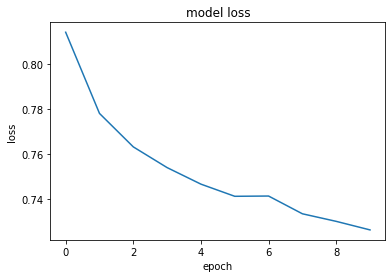

In [17]:
# plot the costs per epoch
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.array(epochs)/datasize)
plt.show()

In [18]:

# this section caculate accuracy of the training

for i in range(datasize):
    tmp_index = choose_max(a3[i])
    output[i][tmp_index] = 1

correct_answer = 0

for i in range(datasize):
    str1 =''
    str2 =''
    for j in range(4):
        str1 += str(int(tmp_trainlabel[i][j]))
        str2 += str(output[i][j])
        
    
    if str1 == str2:
        correct_answer += 1

            

accuracy = correct_answer / datasize

print("accuracy : ", end= '')
print(accuracy*100)

# we expect accuracy of 30 percent

accuracy : 34.5


**Step # 4** Vectorization , epochs_num = 20 , iteration = 10

training the model like the privious section but Repeating it 10 times and getting the average

In [26]:
# training the model by 200 image and 20 epochs

resault = 0

datasize = 200
tmp_traindata = traindata_array[:datasize]
tmp_trainlable = train_lable[:datasize]

batch_size = 16
learning_rate = 0.3
epochs_num = 20 #**


mini_batch = int(datasize/batch_size)


for i in range(10):

    epochs = []

    w1 = np.random.normal(size=(16, 1024))
    w2 = np.random.normal(size=(16, 16))
    w3 = np.random.normal(size=(4, 16))

    b1 = np.zeros((16,1))
    b2 = np.zeros((16,1))
    b3 = np.zeros((4,1))

    output = np.zeros((datasize,4) ,dtype=int)

    for i in range(epochs_num):
        shuffler(tmp_traindata , tmp_trainlable , 100000)
        for j in range(mini_batch):
            grad_w1 = np.zeros_like(w1)
            grad_b1 = np.zeros_like(b1)
            grad_w2 = np.zeros_like(w2)
            grad_b2 = np.zeros_like(b2)
            grad_w3 = np.zeros_like(w3)
            grad_b3 = np.zeros_like(b3)

            batch_train = np.vsplit(tmp_traindata, np.array([16*j, 16*(j+1)]))[1]
            batch_label = np.vsplit(tmp_trainlable, np.array([16*j, 16*(j+1)]))[1]

            for k in range(batch_size):
                
                train_batch = batch_train[k].reshape(1, 1024)
                lable_batch = batch_label[k].reshape(4, 1)

                a1 = sigmoid((np.dot(w1, train_batch.T) + b1))
                a2 = sigmoid((np.dot(w2, a1) + b2))
                a3 = sigmoid((np.dot(w3, a2) + b3))

                grad_w3 += (2 * (a3 - lable_batch) * (a3 * (1 - a3))) @ (a2.T)    
                grad_b3 += (2 * (a3 - lable_batch) * (a3 * (1 - a3)))  

                grad_a2 = (w3.T) @ (2 * (a3 - lable_batch) * (a3 * (1 - a3)))   
                grad_w2 += (grad_a2 * (a2 * (1 - a2))) @ (a1.T)    
                grad_b2 += (grad_a2 * (a2 * (1 - a2)))   
                
                grad_a1 = (w2.T) @ (grad_a2 * (a2 * (1 - a2)))    
                grad_w1 += (grad_a1 * (a1 * (1 - a1))) @ (train_batch) 
                grad_b1 += (grad_a1 * (a1 * (1 - a1)))   

            w3 -= (learning_rate * (grad_w3/batch_size))
            w2 -= (learning_rate * (grad_w2/batch_size))
            w1 -= (learning_rate * (grad_w1/batch_size))

            b3 -= (learning_rate * (grad_b3/batch_size))
            b2 -= (learning_rate * (grad_b2/batch_size))
            b1 -= (learning_rate * (grad_b1/batch_size))

        a1 = sigmoid((np.dot(w1, tmp_traindata.T) + b1))
        a2 = sigmoid((np.dot(w2, a1) + b2))
        a3 = sigmoid((np.dot(w3, a2) + b3))
        a3 = a3.T
        
        cost = cost_func(tmp_trainlable, a3)
        epochs.append(cost)

    for i in range(datasize):
        tmp_index = choose_max(a3[i])
        output[i][tmp_index] = 1

    correct_answer = 0

    for i in range(datasize):
        str1 =''
        str2 =''
        for j in range(4):
            str1 += str(int(tmp_trainlabel[i][j]))
            str2 += str(output[i][j])
            
        
        if str1 == str2:
            correct_answer += 1

                

    accuracy = correct_answer / datasize

    resault += accuracy

resault /= 10 

print("accuracy : ", end= '')
print(accuracy*100)

    

# we expect accuracy of 40 percent


accuracy : 39.5


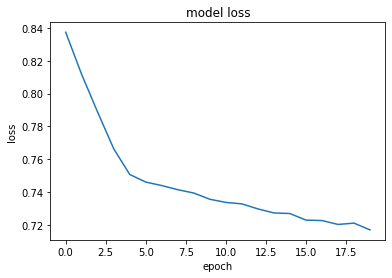

In [27]:
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.array(epochs)/datasize)
plt.show()

Step # 5 Model testing , epochs_num = 40 , iteration = 10

training and testing the model like the privious section but Repeating it 10 times and getting the average

In [21]:
# this function select randomly 8000 image from the whole dataset
def extract_data(indata , inlable, outdata ,outlable, size):

    for i in range(size):

        r1 = random.randint(0, len(indata)-1)
        outdata[i] = indata[r1].copy()
        outlable[i] = inlable[r1].copy()


In [22]:
# initialization some variables and arrays for the training

datasize = 8000

batch_size = 16
learning_rate = 0.3
epochs_num = 40 #**

mini_batch = int(datasize/batch_size)


tmp_traindata = np.zeros((8000,1024))
tmp_trainlable = np.zeros((8000,4))

extract_data(traindata_array , train_lable ,tmp_traindata ,tmp_trainlable , datasize )


In [23]:
# training the model by 8000 image and 40 epochs

for i in range(10):

    epochs = []

    w1 = np.random.normal(size=(16, 1024))
    w2 = np.random.normal(size=(16, 16))
    w3 = np.random.normal(size=(4, 16))

    b1 = np.zeros((16,1))
    b2 = np.zeros((16,1))
    b3 = np.zeros((4,1))

    output = np.zeros((datasize,4) ,dtype=int)

    for i in range(epochs_num):
        shuffler(tmp_traindata , tmp_trainlable , 100000)
        for j in range(mini_batch):
            grad_w1 = np.zeros_like(w1)
            grad_b1 = np.zeros_like(b1)
            grad_w2 = np.zeros_like(w2)
            grad_b2 = np.zeros_like(b2)
            grad_w3 = np.zeros_like(w3)
            grad_b3 = np.zeros_like(b3)

            batch_train = np.vsplit(tmp_traindata, np.array([16*j, 16*(j+1)]))[1]
            batch_lable = np.vsplit(tmp_trainlable, np.array([16*j, 16*(j+1)]))[1]

            for k in range(batch_size):
                
                train_batch = batch_train[k].reshape(1, 1024)
                lable_batch = batch_lable[k].reshape(4, 1)

                a1 = sigmoid((np.dot(w1, train_batch.T) + b1))
                a2 = sigmoid((np.dot(w2, a1) + b2))
                a3 = sigmoid((np.dot(w3, a2) + b3))

                grad_w3 += (2 * (a3 - lable_batch) * (a3 * (1 - a3))) @ (a2.T)    
                grad_b3 += (2 * (a3 - lable_batch) * (a3 * (1 - a3)))  

                grad_a2 = (w3.T) @ (2 * (a3 - lable_batch) * (a3 * (1 - a3)))   
                grad_w2 += (grad_a2 * (a2 * (1 - a2))) @ (a1.T)    
                grad_b2 += (grad_a2 * (a2 * (1 - a2)))   
                
                grad_a1 = (w2.T) @ (grad_a2 * (a2 * (1 - a2)))    
                grad_w1 += (grad_a1 * (a1 * (1 - a1))) @ (train_batch) 
                grad_b1 += (grad_a1 * (a1 * (1 - a1)))   

            w3 -= (learning_rate * (grad_w3/batch_size))
            w2 -= (learning_rate * (grad_w2/batch_size))
            w1 -= (learning_rate * (grad_w1/batch_size))

            b3 -= (learning_rate * (grad_b3/batch_size))
            b2 -= (learning_rate * (grad_b2/batch_size))
            b1 -= (learning_rate * (grad_b1/batch_size))

        a1 = sigmoid((np.dot(w1, tmp_traindata.T) + b1))
        a2 = sigmoid((np.dot(w2, a1) + b2))
        a3 = sigmoid((np.dot(w3, a2) + b3))
        a3 = a3.T
        
        cost = cost_func(tmp_trainlable, a3)
        epochs.append(cost)

    for i in range(datasize):
        tmp_index = choose_max(a3[i])
        output[i][tmp_index] = 1

    correct_answer = 0

    for i in range(datasize):
        str1 =''
        str2 =''
        for j in range(4):
            str1 += str(int(tmp_trainlable[i][j]))
            str2 += str(output[i][j])
            
        
        if str1 == str2:
            correct_answer += 1

                

    accuracy = correct_answer / datasize

    resault += accuracy

resault /= 10 

print("accuracy : ", end= '')
print(accuracy*100)

# we expect accuracy of 55 percent

accuracy : 57.825


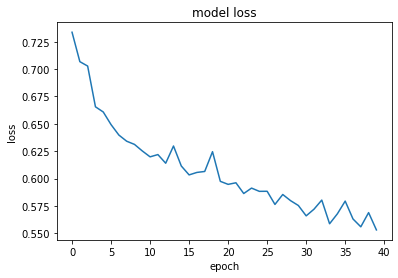

In [24]:
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.array(epochs)/datasize)
plt.show()

In [25]:
# this section is for getting the accuracy of test dataset 

datasize = 4000

a1 = sigmoid((np.dot(w1, testdata_array.T) + b1))
a2 = sigmoid((np.dot(w2, a1) + b2))
a3 = sigmoid((np.dot(w3, a2) + b3))
a3 = a3.T

output = np.zeros((datasize,4) ,dtype=int)

for i in range(datasize):
    tmp_index = choose_max(a3[i])
    output[i][tmp_index] = 1

correct_answer = 0

for i in range(datasize):
    str1 =''
    str2 =''
    for j in range(4):
        str1 += str(int(test_lable[i][j]))
        str2 += str(output[i][j])
        
    
    if str1 == str2:
        correct_answer += 1

            

accuracy = correct_answer / datasize

print("accuracy : ", end= '')
print(accuracy*100)

accuracy : 50.7
